# 0. General Comments
- written in **english** to reflect the content of the assigment
- code for each section (**Data Description**, **Clustering**, **Classification**, **Regression**) is placed directly below the Markdown describing the results
- written by Artur Walczak, e-mail adress: aw448663@students.mimuw.edu.pl

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("earnings.csv", sep=";")

# 1. Data Description

## 1.1. Structure of the dataset

The dataset contains a total of **11,000 observations** and **15 variables**.

Out of these, **10 variables are quantitative**:

- `base`
- `bonus`
- `overtime_pay`
- `other`
- `age`
- `duration_total`
- `duration_entity`
- `duration_nominal`
- `duration_overtime`

And **5 are qualitative**:
- `sector`
- `section_07`
- `sex`
- `education`
- `contract`

There are is no missing values in the data set. Every cell in every column in filled.

In [12]:
# Code used to get necessary information for 1.1
print(data.shape) # Get the dimensions of the data
print(data.dtypes) # Show the columns to properly split them into quantitative and qaulitative
quantitative_cols = ['base', 'bonus', 'overtime_pay', 'other', 'age', 
                'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
qualitative_cols = ['sector', 'section_07', 'sex', 'education', 'contract']
data.isnull().sum() # Count the number of missing entries from the data

(11000, 16)
id                     int64
base                 float64
bonus                float64
overtime_pay         float64
other                float64
sector                 int64
section_07             int64
sex                    int64
education              int64
contract               int64
age                    int64
duration_total       float64
duration_entity      float64
duration_nominal     float64
duration_overtime    float64
high_edu               int64
dtype: object


id                   0
base                 0
bonus                0
overtime_pay         0
other                0
sector               0
section_07           0
sex                  0
education            0
contract             0
age                  0
duration_total       0
duration_entity      0
duration_nominal     0
duration_overtime    0
high_edu             0
dtype: int64

## 1.2. Descriptive statistics and frequency tables
### Quantitative Variables

- **base**
  - Mean: 33,376.74
  - Std Dev: 19,276.55
  - Median: 31,341.25

- **bonus**
  - Mean: 2,188.49  
  - Std Dev: 4,966.44  
  - Median: 620.00

- **overtime_pay**
  - Mean: 1,679.27  
  - Std Dev: 5,407.96  
  - Median: 0.00

- **other**
  - Mean: 2,477.63  
  - Std Dev: 3,715.42  
  - Median: 2,141.82

- **age**
  - Mean: 42.47  
  - Std Dev: 10.01  
  - Median: 43.00

- **duration_total**
  - Mean: 18.57  
  - Std Dev: 10.99  
  - Median: 19.04

- **duration_entity**
  - Mean: 11.40  
  - Std Dev: 9.32  
  - Median: 9.10

- **duration_nominal**
  - Mean: 1,301.31  
  - Std Dev: 540.19  
  - Median: 1,591.90

- **duration_overtime**
  - Mean: 47.70  
  - Std Dev: 111.96  
  - Median: 0.00

### Qualitative Variables

- **sector**
  - 1: 10,548
  - 2: 452

- **section_07** (1 – Public Administration and Defence; Compulsory Social Security,
                                2 – Education, 3 – Human Health and Social Work Activities)
  - 2: 5,867
  - 3: 2,732
  - 1: 2,401

- **sex**  (1 – man, 2 – woman)
  - 2: 8,289
  - 1: 2,711

- **education**  (1 – doctorate, 2 – higher, 3 –post-secondary, 4 – secondary,
                                5 – basic vocational, 6 – middle school and below)
  - 2: 6,633
  - 4: 1,983
  - 5: 906
  - 3: 680
  - 1: 430
  - 6: 368

- **contract**  (1 – for an indefinite period, 2 – for a definite period)
  - 1: 9,306
  - 2: 1,694

In [3]:
# Code used to get necessary information for 1.2
data[quantitative_cols].describe()

,base,bonus,overtime_pay,other,age,duration_total,duration_entity,duration_nominal,duration_overtime
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.00000,11000.000000,11000.000000,11000.000000
mean,33376.738065,2128.486176,1679.273923,2477.625815,42.470182,18.56708,11.401382,1301.307435,47.702325
std,19276.551638,4966.444726,5407.964344,3715.419120,10.012140,10.99695,9.322181,540.189234,111.963867
min,10.000000,0.000000,0.000000,0.000000,19.000000,0.01000,0.010000,12.800000,0.000000
25%,20995.115000,0.000000,0.000000,0.000000,34.000000,9.03000,3.070000,766.800000,0.000000
50%,31341.245000,620.000000,0.000000,2141.820000,43.000000,19.03500,9.100000,1591.900000,0.000000
75%,41348.290000,2940.717500,1139.330000,3497.430000,51.000000,27.11000,18.040000,1768.000000,40.000000
max,241624.390000,258061.000000,228110.340000,88555.760000,77.000000,57.02000,46.010000,2024.000000,1812.580000


In [4]:
for col in qualitative_cols:
    print(data[col].value_counts())

sector
1    10548
2      452
Name: count, dtype: int64
section_07
2    5867
3    2732
1    2401
Name: count, dtype: int64
sex
2    8289
1    2711
Name: count, dtype: int64
education
2    6633
4    1983
5     906
3     680
1     430
6     368
Name: count, dtype: int64
contract
1    9306
2    1694
Name: count, dtype: int64


## 1.3 Distribution Analysis of Quantitative Variables
We examined the distributions of the quantitative variables in our dataset:
- **base**: Relatively close to the normal distribution.

- **bonus**: The normal distribution does not fit well. Most values are clustered around zero, with very few high values, producing a right-skewed distribution.

- **overtime_pay**: Similiar as above.

- **other**: Similiar as above.

- **age**: Relatively close to the normal distribution, but with big differences for specific ages (range 46-48).

- **duration_total**:  The normal distribution doesn't represent it very effectively. The duration is fairly similiar up to 30, then drops drastically.

- **duration_entity**: The normal distribution doesn't represent it very effectively. The density gradually lowers, it is inconsistent.

- **duration_nominal**: The normal distribution does not represent it at all effectively. The distribution appears bimodal, with two distinct peaks, suggesting two separate groups or behaviors within the data.

- **duration_overtime**: The normal distribution does not fit well. Most values are clustered around zero, with very few high values, producing a right-skewed distribution.

/home/artur/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


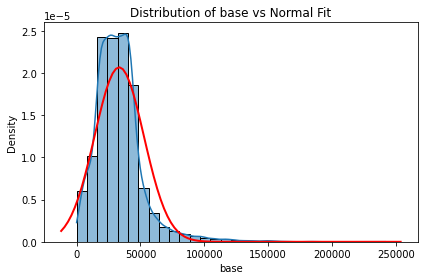

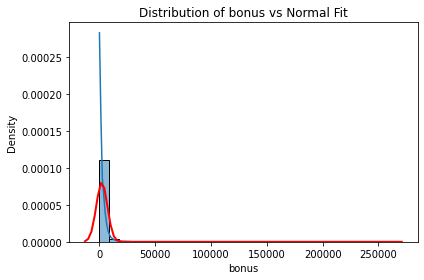

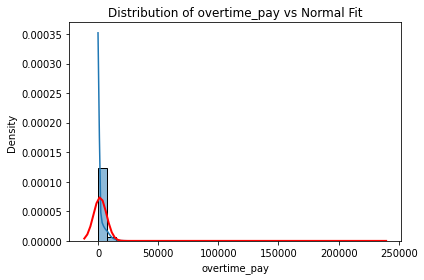

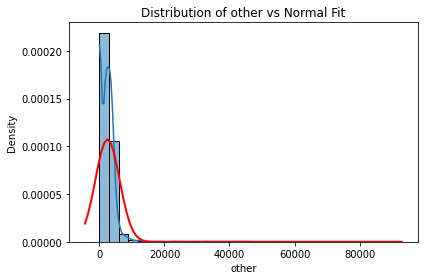

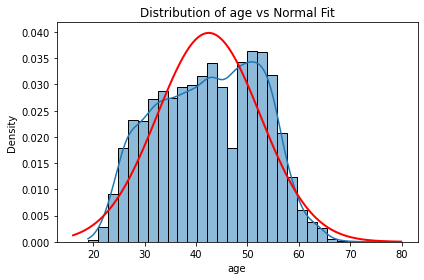

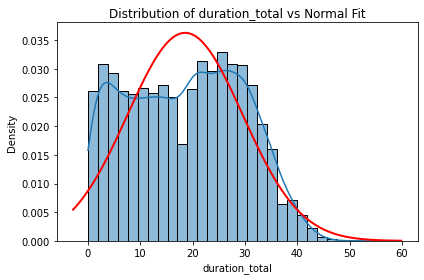

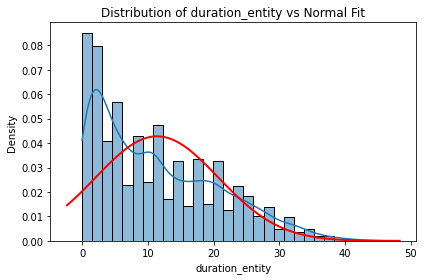

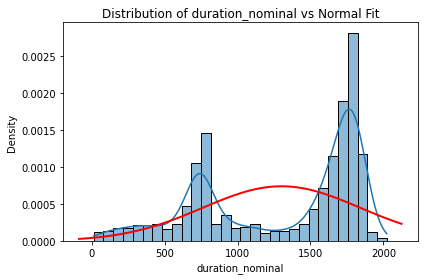

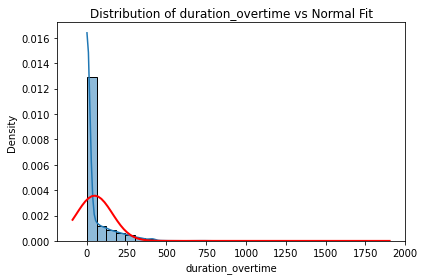

In [5]:
# Code necessary for 1.3.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

for col in quantitative_cols:
    arr = data[col].to_numpy()  # Ensure 1D numpy array

    plt.figure(figsize=(6, 4))
    sns.histplot(arr, kde=True, stat='density', bins=30)

    # Fit a normal distribution
    mu, std = norm.fit(arr)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)

    plt.title(f'Distribution of {col} vs Normal Fit')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

# 2. Clustering 

### KMeans Clustering: Duration Overtime & Compensation

**Variables Used:**
- `duration_overtime`
- `compensation`: Sum of `base`, `bonus`, and `overtime_pay`, capturing overall pay.

**Data Manipulation:**
- A new column `compensation` was created for a better view of earnings
- Both features were standardized to ensure equal contribution to the metric

**Metric:**
- KMeans with **Euclidean distance** 

**Reasoning:**
- Combining all pay components into `compensation` gives a fuller picture of financial reward, which, together with overtime worked, will reveal clusters of similar compensation based on the overtime working hours.
- Standardization is critical as pay and overtime are on different scales.

**Outcomes:**
- Silhouette analysis identified the optimal number of clusters to be k = 3.
- The resulting plot shows that 


### KMeans Clustering: Base Pay, Duration, and Gender

**Variables Used:**
- `base`: Base salary.
- `duration_total`: Total duration (e.g., years of service).
- `sex`: Encoded as integers via `LabelEncoder` to allow inclusion in clustering.

**Data Manipulation:**
- Encoded the `sex` variable.
- All features standardized.

**Metric:**
- KMeans with **Euclidean distance**.

**Reasoning:**
- Including `sex` enables investigation of potential gender-based clustering patterns in pay and tenure.
- Standardization ensures that each variable (including the encoded categorical) contributes appropriately to the distance calculation.

**Outcomes:**
- Silhouette analysis identified the optimal number of clusters to be k = 3.
- Clustering doesn't seem to find a visible difference between the salaries of the different sexes, suggesting that employees are treated equally in terms of gender.


### Agglomerative Clustering: Duration Total & Base Salary

**Variables Used:**
- `duration_total`: Total duration, representing time with employer.
- `base`: Base salary.

**Data Manipulation:**
- Missing values imputed with medians.
- Variables standardized to unit variance and zero mean.

**Metric:**
- **Cosine distance** with average linkage, selected to capture differences in relative relationship between variables rather than only amounts.

**Rationale:**
- Cosine is chosen over Euclidean to highlight clusters where the ratio between salary and work duration is similar, even if their absolute values differ. Employees with proportional increases in base pay and duration ofttheier employment may be grouped together.
- Standardization is still important to preventing bias coming from different scales.

**Outcome:**
- Silhouette scores guide selection of the optimal cluster number.
- Resulting plot visualizes clusters in the standardized salary-tenure space, with groupings reflecting similar patterns of duration and pay.


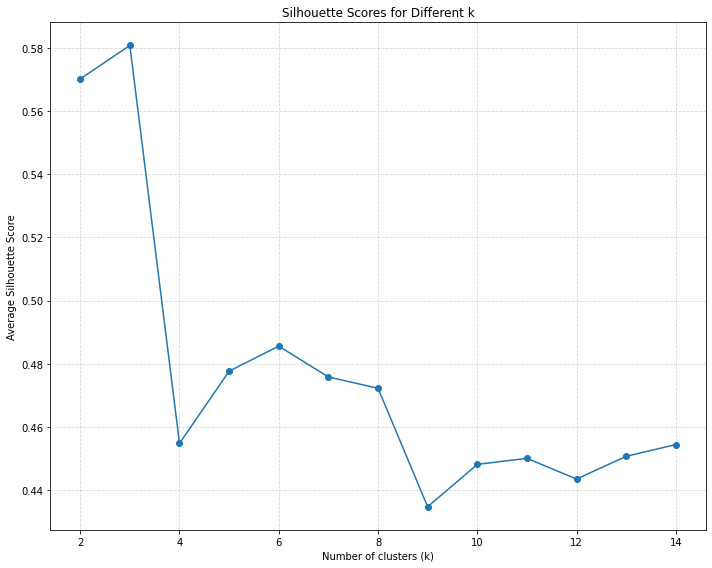

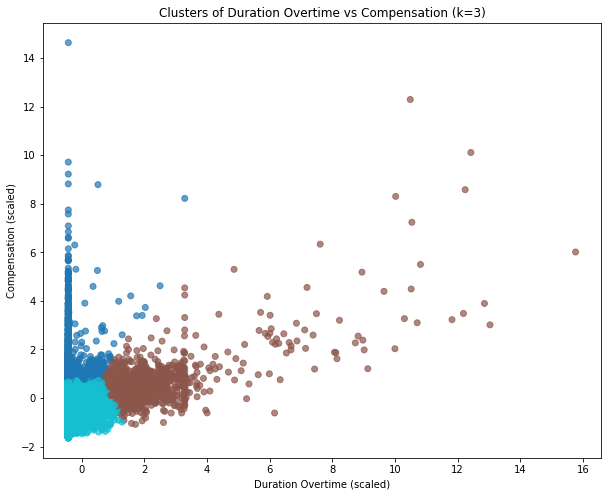

In [6]:
# Code necessary for 2. using Kmeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = data.copy();
X['compensation'] = X['base'] + X['bonus'] + X['overtime_pay']
X = X[['duration_overtime', 'compensation']].copy()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Silhouette analysis to find optimal k
silhouette_scores = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=137)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Find optimal k and plot final clusters
optimal_k = K_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='tab10', alpha=0.7)
plt.xlabel('Duration Overtime (scaled)')
plt.ylabel('Compensation (scaled)')
plt.title(f'Clusters of Duration Overtime vs Compensation (k={optimal_k})')
plt.show()

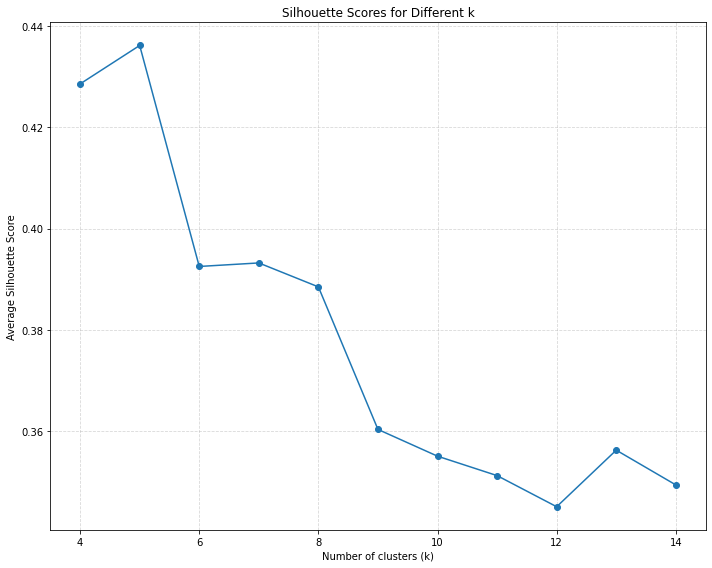

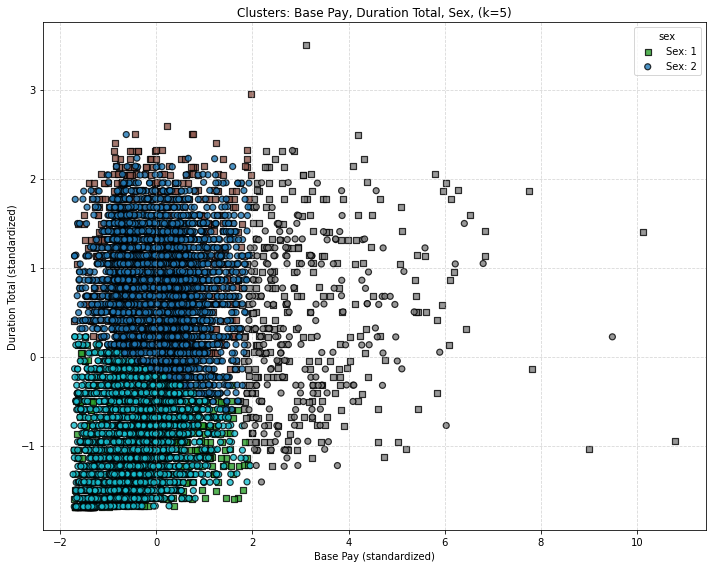

In [7]:
# Code necessary for 2. using Kmeans
X = data[['base', 'duration_total', 'sex']].copy()
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
sex_names = le.classes_

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Run KMeans for different values of k and calculate silhouette scores
silhouette_scores = []
K_range = range(4, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=137)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Find optimal k and plot final clusters
optimal_k = K_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=137)
labels = kmeans.fit_predict(X_scaled)
shapes = ['s', 'o'] 
colors = plt.cm.tab10(np.linspace(0, 1, optimal_k))

plt.figure(figsize=(10, 8))
for sex in np.unique(X['sex']):
    sex_mask = (X['sex'] == sex)
    plt.scatter(
        X_scaled[sex_mask, 0], X_scaled[sex_mask, 1],
        c=colors[labels[sex_mask]],
        edgecolor='black',
        marker=shapes[sex],
        label=f"Sex: {sex_names[sex]}",
        alpha=0.8,
        linewidth=1.2
    )
plt.xlabel('Base Pay (standardized)')
plt.ylabel('Duration Total (standardized)')
plt.title(f'Clusters: Base Pay, Duration Total, Sex, (k={optimal_k})')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="sex")
plt.tight_layout()
plt.show()

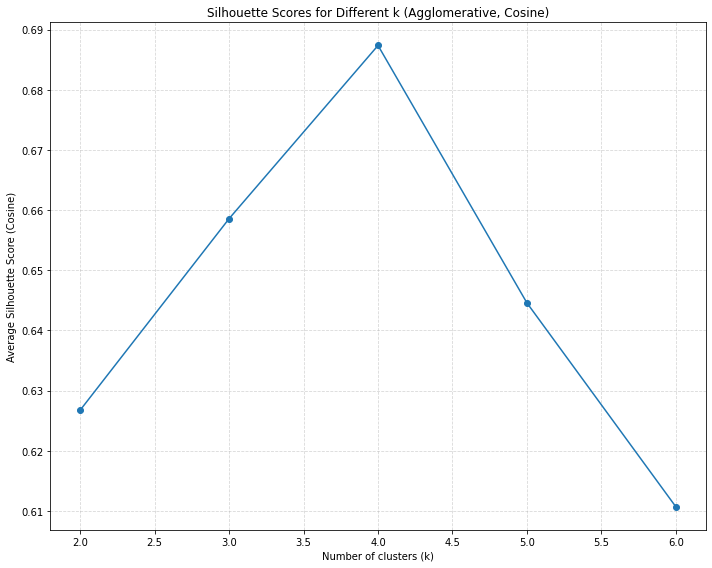

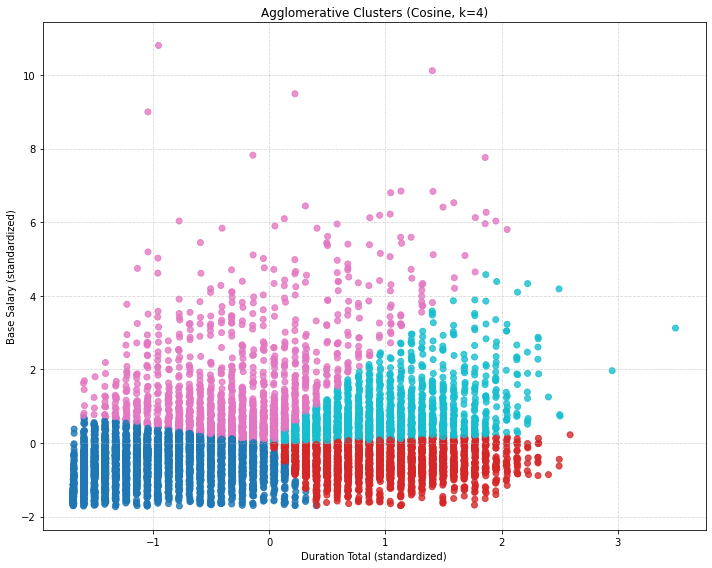

In [8]:
# Code necessary for 2. using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X = data[['duration_total', 'base']].copy()
X_scaled = StandardScaler().fit_transform(X)

# Try different values of k and calculate silhouette scores with 'manhattan' (cityblock) distance
silhouette_scores = []
K_range = range(2, 7)
for k in K_range:
    agg = AgglomerativeClustering(n_clusters=k, metric='cosine', linkage='average')
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels, metric='cosine')
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score (Cosine)')
plt.title('Silhouette Scores for Different k (Agglomerative, Cosine)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Find optimal k and plot clusters
optimal_k = K_range[np.argmax(silhouette_scores)]
agg = AgglomerativeClustering(n_clusters=optimal_k, metric='cosine', linkage='average')
labels = agg.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='tab10', alpha=0.8)
plt.xlabel('Duration Total (standardized)')
plt.ylabel('Base Salary (standardized)')
plt.title(f'Agglomerative Clusters (Cosine, k={optimal_k})')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Classification

## 3.1. Training the models

We build three different models - **KNeighborsClassifier**, **GaussianNB**, **RandomForestClassifier**. 

They are supposed to predict if the employee has higher education (data['education'] <= 2).

The data was divided into training and testing (90% train, 10% test)

## 3.2. Testing the models

### Tests
We test each model using three methods:
- `Usual f-1 Test`
- `Cross Value Score`
- `Resampling (Bootstrap)`

### Results for a random train-test split

**KNeighborsClassifier:**
- `Usual f-1 Test`: 0.679
- `Cross Value Score`: 0.695 ± 0.005
- `Resampling (Bootstrap)`: 0.660 ± 0.008

**GaussianNB:**
- `Usual f-1 Test`: 0.815
- `Cross Value Score`: 0.801 ± 0.016
- `Resampling (Bootstrap)`: 0.810 ± 0.031

**RandomForestClassifier:**
- `Usual f-1 Test`: 0.908
- `Cross Value Score`: 0.903 ± 0.008
- `Resampling (Bootstrap)`: 0.908 ± 0.002

## 3.3. The most important features for RandomForest Model
| Feature            | Importance |
|--------------------|-----------|
| duration_nominal   | 0.214385  |
| base               | 0.178571  |
| other              | 0.142299  |
| duration_total     | 0.119777  |
| age                | 0.107086  |
| duration_entity    | 0.062874  |
| bonus              | 0.051758  |
| id                 | 0.051319  |
| overtime_pay       | 0.043823  |
| duration_overtime  | 0.028109  |

----------------------------------------
          KNeighborsClassifier
----------------------------------------
KNeighborsClassifier Test F1: 0.679
KNeighborsClassifier CV F1: 0.695 ± 0.005
KNeighborsClassifier Bootstrap F1: 0.660 ± 0.008


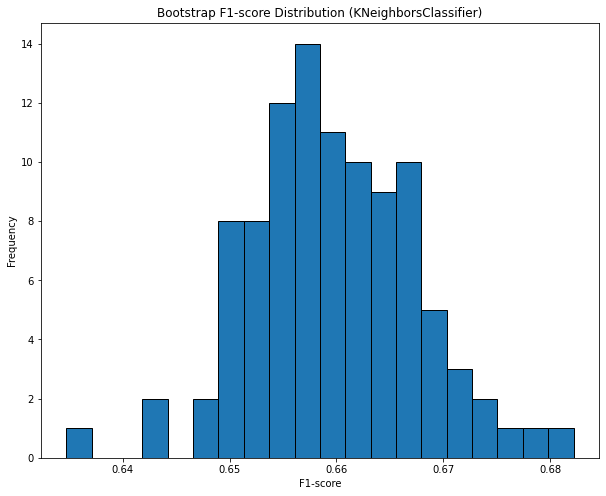

----------------------------------------
               GaussianNB
----------------------------------------
GaussianNB Test F1: 0.815
GaussianNB CV F1: 0.801 ± 0.016
GaussianNB Bootstrap F1: 0.810 ± 0.031


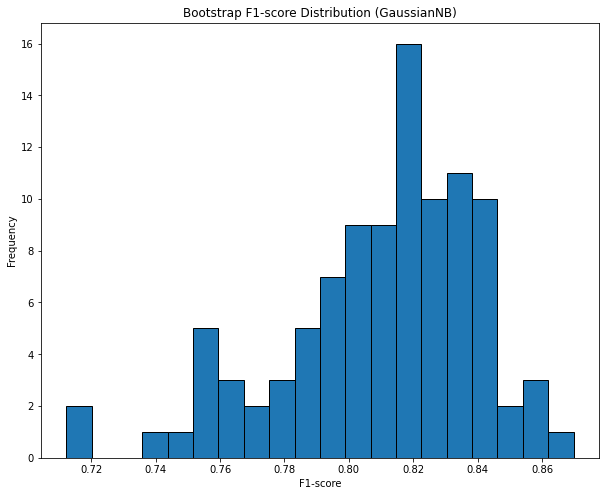

----------------------------------------
         RandomForestClassifier
----------------------------------------
RandomForestClassifier Test F1: 0.908
RandomForestClassifier CV F1: 0.903 ± 0.008
RandomForestClassifier Bootstrap F1: 0.908 ± 0.002


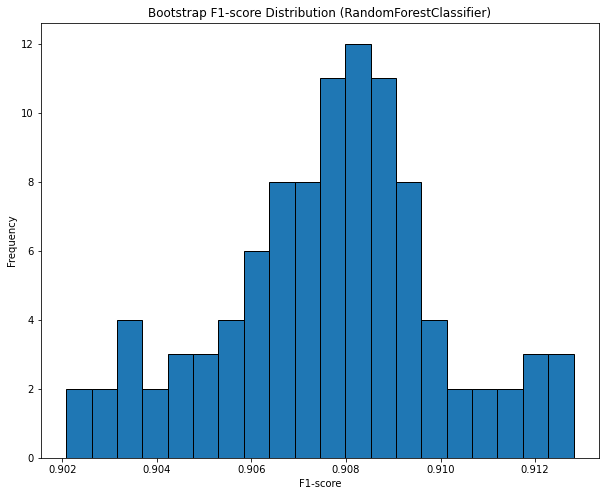

RandomForest Feature Importances:
duration_nominal     0.214385
base                 0.178571
other                0.142299
duration_total       0.119777
age                  0.107086
duration_entity      0.062874
bonus                0.051758
id                   0.051319
overtime_pay         0.043823
duration_overtime    0.028109
dtype: float64


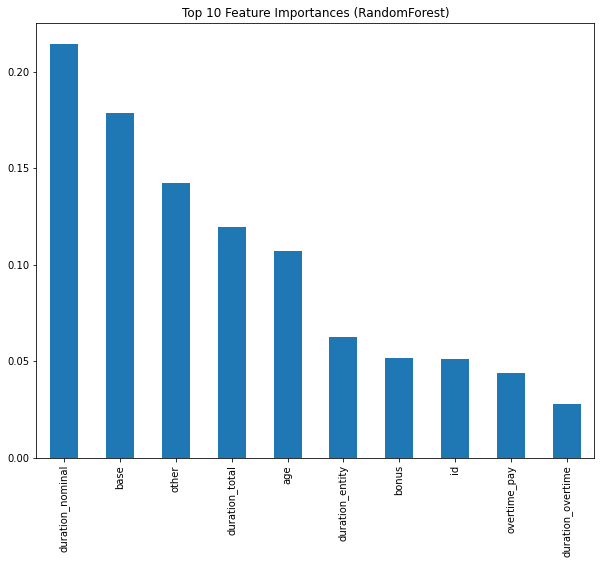

In [9]:
# Code necessary for 3. Classification with three different models (KNeighborsClassifier, GaussianNB, RandomForestClassifier).
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.utils import resample

# Select and split the data.
data['high_edu'] = (data['education'] <= 2).astype(int)
X = data.drop(columns=['high_edu'])
X = X.drop(columns = qualitative_cols)
y = data['high_edu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=137)

# Properly scale the data for KNeighborsClassifier and GaussianNB
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[quantitative_cols] = scaler.fit_transform(X_train[quantitative_cols])
X_test_scaled[quantitative_cols] = scaler.transform(X_test[quantitative_cols])

# Preparation before training
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(random_state=137)
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=137)

# Training each model
for name, model in models.items():
    c_val = int((40 - len(name) + len(name) % 2) / 2)
    print('-' * 40)
    print(' ' * c_val + name)
    print('-' * 40)
    if name =='KNeighborsClassifier' or name == 'GaussianNB':
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    # Calculate the usual f_1 score
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    print(f"{name} Test F1: {f1_score(y_test, y_pred):.3f}")
    
    # Calculate the Cross Value Score of the model
    cv_scores = cross_val_score(model, X_tr, y_train, cv=cv, scoring='f1')
    print(f"{name} CV F1: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

    # Calculate the f_1 score using Bootstrap (resampling)
    n_iterations = 100
    rng = np.random.RandomState(137)
    bootstrap_scores = []
    for i in range(n_iterations):
        X_resampled, y_resampled = resample(X_tr, y_train, replace=True, random_state=rng)
        model.fit(X_resampled, y_resampled)
        y_pred_boot = model.predict(X_te)
        score = f1_score(y_test, y_pred_boot)
        bootstrap_scores.append(score)
    print(f"{name} Bootstrap F1: {np.mean(bootstrap_scores):.3f} ± {np.std(bootstrap_scores):.3f}")

    # Plot the results of Bootstrap testing
    plt.figure(figsize=(10, 8))
    plt.hist(bootstrap_scores, bins=20, edgecolor='k')
    plt.title(f"Bootstrap F1-score Distribution ({name})")
    plt.xlabel("F1-score")
    plt.ylabel("Frequency")
    plt.show()

# Calculate the most important features for RandomForest Model which performed the best.
rf = RandomForestClassifier(random_state=137)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("RandomForest Feature Importances:")
print(importances)

# Plot the results
plt.figure(figsize=(10, 8))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (RandomForest)")
plt.show()

# 4. Regression

## 4.1. Building a Regression model

    We built a Linear Regression model that is supposed to predict the base salary based on other variables from the data set.

    I included the Higher Education column created in 3. to further illustrate the correlation of higher education with the base salary.
    
### Methodology
- **Model used:** Linear Regression
- **Feature selection:** Only variables with a significant correlation (>0.25) to base salary were included
- **Data split:** The data was divided into training and testing (90% train, 10% test)
- **Performance tests:**
  - **Test MSE:** 226,897,897.46
  - **Test R²:** 0.441
  - **Cross-validated R²:** 0.425 ± 0.016

### Variables Included and Their Roles

| Variable           | Coefficient     | Role/Interpretation |
|--------------------|----------------|----------------------|
| duration_nominal   | 7,753.82       | **Positive:**        |
| high_edu           | 6,561.33       | **Positive:**        |
| duration_entity    | 3,903.03       | **Positive:**        |
| other              | 3,648.74       | **Positive:**        |
| education          | -5,136.85      | **Negative:**        |
| contract           | -6,842.55      | **Negative:**        |

- **Positive coefficients** when increased, are associated with an increase in base salary
- **Negative coefficients** when increased, are associated with a decrease in base salary
- The magnitude reflects the strength of the association with base salary, holding other variables constant

### Discussion

- **Duration-related variables** (`duration_nominal`, `duration_entity`) have strong positive effects, suggesting that employees with longer tenures or nominal durations tend to have higher base salaries
- **High education level** is strongly associated with higher base salaries, while the variable `education` has a negative coefficient —further affirming the value of education in salary determination, since higher values in education column indicate lower education
- **Other compensation** positively impacts base salary, possibly indicating that higher total compensation packages correlate with higher base salaries
- **Contract type** has a substantial negative effect, suggesting that an indefinite contract usually gives you a higher base salary than a contract for a definite period of time

### Conclusion

The regression model demonstrates moderate predictive power (R² ~ 0.44). All variables retained in the model show a clear and interpretable relationship with base salary, either positive or negative, reflecting their importance in salary determination.

['base', 'bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
Test MSE: 226897897.46
Test R2: 0.441
CV R2: 0.425 ± 0.016
Variable roles (Linear Regression coefficients):
overtime_pay         3648.738176
education           -5136.849902
contract            -6842.551719
duration_total       3903.027037
duration_entity      7753.822925
duration_overtime    2557.635309
high_edu             1226.092524
dtype: float64


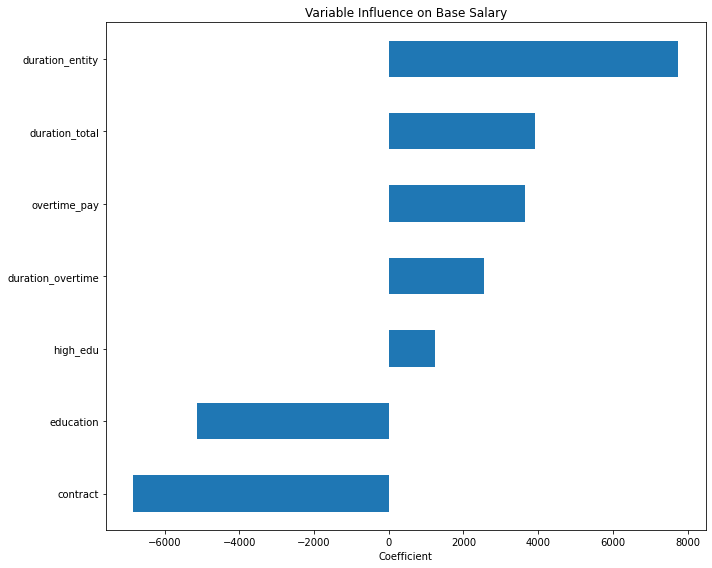

In [18]:
# Code necessary for 4. (Regression)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Prepare features
data['high_edu'] = (data['education'] <= 2).astype(int)
X = data.drop(columns=['id', 'base'])
y = data['base']
scaler = StandardScaler()
X_scaled = X.copy()
cols = quantitative_cols.copy()
print(cols)
cols.remove('base')
X_scaled[quantitative_cols] = scaler.fit_transform(X[cols+['high_edu']])

# Pick only those variabiales who have a significant correlation to the base salary
correlations = X_scaled.corrwith(y).abs()
selected_feats = correlations[correlations > 0.25].index
X_selected = X_scaled[selected_feats]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.1, random_state=137
)

# Build and train the regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate model performance 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv = KFold(n_splits=5, shuffle=True, random_state=137)
cv_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='r2')
print(f"Test MSE: {mse:.2f}")
print(f"Test R2: {r2:.3f}")
print(f"CV R2: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")\

# Calculate the positive and negative influence of each used variable
coefs = pd.Series(lr.coef_, index=X_selected.columns)
print("Variable roles (Linear Regression coefficients):")
print(coefs)

# Plot the results
plt.figure(figsize=(10,8))
coefs.sort_values().plot(kind='barh')
plt.xlabel('Coefficient')
plt.title('Variable Influence on Base Salary')
plt.tight_layout()
plt.show()